In [1]:
from feature_engineering import *

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import tree

import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# read data in and write out data
data_dir = './data/'
train_df = pd.read_csv(data_dir + 'train.csv')
test_df = pd.read_csv(data_dir + 'test.csv')

# writing out to results file
def write_out(predictions):
    df_results = pd.DataFrame(predictions, columns=['label'])
    df_results.index.names = ['ID']
    df_results.to_csv(data_dir + 'results.csv')

In [3]:
# do feature engineering
train_df = date_features(train_df)
train_df = mail_features(train_df)
train_df = org_features(train_df)
train_df = chars_in_subject_features(train_df)
train_df = urls_features(train_df)
train_df = tld_features(train_df)
train_df = salutation_designation_features(train_df)
train_df = image_features(train_df)

test_df = date_features(test_df)
test_df = mail_features(test_df)
test_df = org_features(test_df)
test_df = chars_in_subject_features(test_df)
test_df = urls_features(test_df)
test_df = tld_features(test_df)
test_df = salutation_designation_features(test_df)
test_df = image_features(test_df)

In [4]:
print(set(train_df.columns) - set(test_df.columns))
print(set(test_df.columns) - set(train_df.columns))
test_df.columns

{'label', 'idm', 'porn'}
set()


Index(['Unnamed: 0', 'date', 'org', 'tld', 'ccs', 'bcced', 'mail_type',
       'images', 'urls', 'salutations', 'designation', 'chars_in_subject',
       'chars_in_body', 'date_time', 'time', 'time_zone', 'year', 'month',
       'day', 'weekday', 'weekend', 'work_day', 'mail_type_0', 'mail_type_1',
       'multipart', 'text', 'alternative', 'html', 'mixed', 'plain', 'related',
       'academia', 'bank', 'centralesupelec', 'coding', 'email',
       'entertainment', 'food', 'google', 'offers_newsletters',
       'online_courses', 'online_shopping', 'other', 'social_media',
       'softwares', 'travel', 'chars_in_subject_binned', 'urls_binned',
       'sals+designation', 'average_images', 'many_images', 'no_images',
       'very_few_images'],
      dtype='object')

In [23]:
# select columns / split into x and y 
X_train = train_df[train_df.columns.difference(['multipart', 'mail_type_1', 'mail_type_0', 'images', 'salutations', 'designation', 'Unnamed: 0', 'label', 'date', 'org', 'tld', 'time_zone', 'date_time', 'time', 'mail_type', 'chars_in_subject', 'urls', 'weekday'])]
y_train = train_df['label']

test_df['idm'] = 0
test_df['porn'] = 0
X_test = test_df[test_df.columns.difference(['multipart', 'mail_type_1', 'mail_type_0', 'images', 'salutations', 'designation', 'Unnamed: 0', 'label', 'date', 'org', 'tld','time_zone', 'date_time', 'time', 'mail_type', 'chars_in_subject', 'urls', 'weekday'])]


In [24]:
# define classifier 
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
# predict 
y_pred = clf.predict(X_test)
result_rf = cross_val_score(clf, X_train, y_train, cv=5)
result_rf.mean()

0.9210546320160529

In [26]:
def show_feature_importance(classifier, training_data, top = 20) :
    #print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(classifier.feature_importances_, index=training_data.columns)
    feat_importances.nlargest(top).plot(kind='barh')
    plt.show()

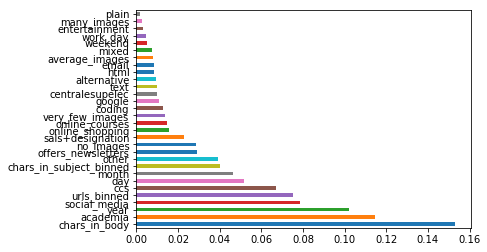

In [27]:
show_feature_importance(clf, X_train, 30)



In [28]:
write_out(y_pred)